# Familienfinder
- Features: a, e, i

- Das Ziel: Asteroidenfamilien finden.

- Warum? Wenn Asteroiden vor Jahrmillionen durch eine Kollision entstanden sind, haben sie oft sehr ähnliche Bahnelemente (a, e, i), auch wenn sie heute weit verstreut wirken. Ein Cluster-Algorithmus kann diese "Geschwister" wieder zusammenführen.


In [1]:
from sklearn.cluster import KMeans
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt 
%matplotlib inline

# Load and Sort

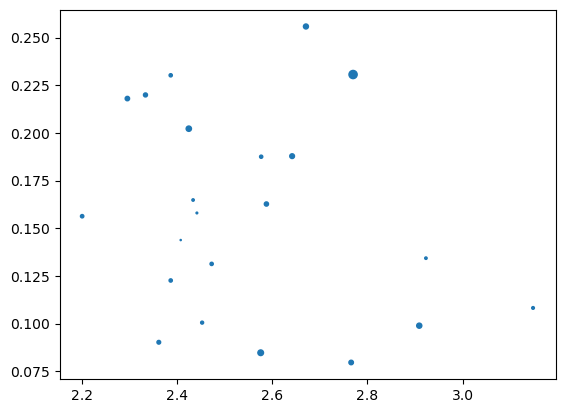

In [4]:
df = pd.read_csv('GPT.csv')

features = ['a', 'e', 'i']
X = df[features].dropna()

X.head()
plt.scatter(X['a'],X['e'],X['i']) 

# Scale

In [5]:
scaler = MinMaxScaler()
scaler.fit(X[["a"]])
X['a'] = scaler.transform(X[['a']])

scaler.fit(X[['e']])
X['e'] = scaler.transform(X[['e']])

scaler.fit(X[['i']])
X['i'] = scaler.transform(X[['i']])

X.head()

,a,e,i
0,0.596621,0.000000,0.288720
1,0.600845,0.856981,1.000000
2,0.496304,1.000000,0.358854
3,0.170011,0.060159,0.187902
4,0.397043,0.612372,0.135885


# Elbow Technique

/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of

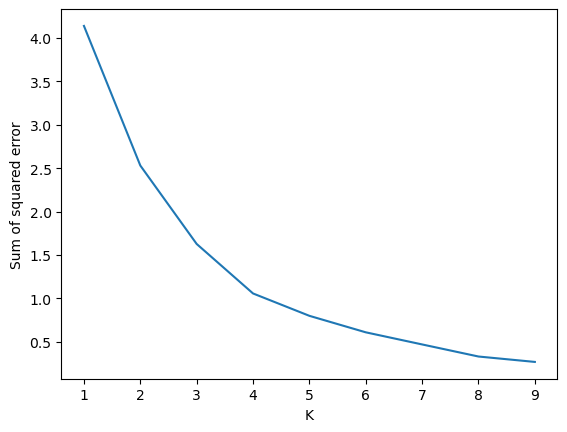

In [6]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X[['a','e','i']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Cluster and Predict

In [7]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(X[['a','e','i']])
y_predicted
X['cluster'] = y_predicted
X.head()

/Users/philippstorz/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,a,e,i,cluster
0,0.596621,0.000000,0.288720,1
1,0.600845,0.856981,1.000000,2
2,0.496304,1.000000,0.358854,3
3,0.170011,0.060159,0.187902,0
4,0.397043,0.612372,0.135885,3


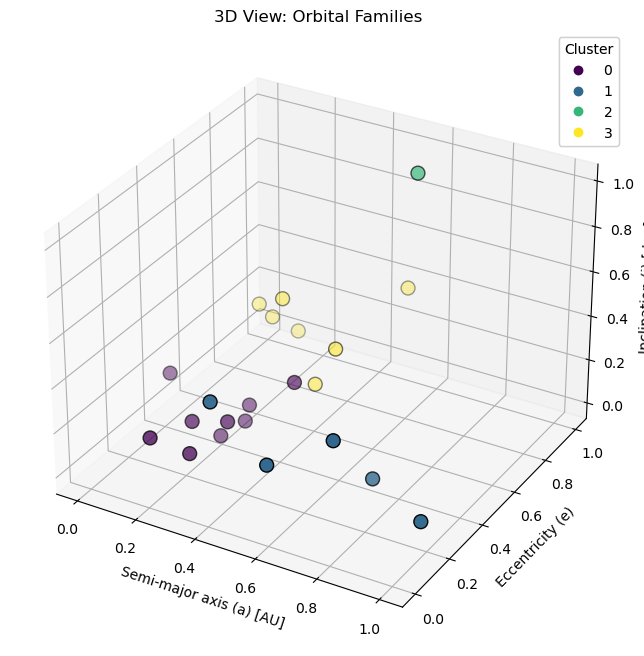

In [8]:
# Setup figure
fig = plt.figure(figsize=(18, 8))

# 3D Scatter
ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(X['a'], X['e'], X['i'], c=X['cluster'], cmap='viridis', s=100, edgecolor='k')
ax1.set_xlabel('Semi-major axis (a) [AU]')
ax1.set_ylabel('Eccentricity (e)')
ax1.set_zlabel('Inclination (i) [deg]')
ax1.set_title('3D View: Orbital Families')
legend1 = ax1.legend(*scatter.legend_elements(), title="Cluster")
ax1.add_artist(legend1)

# Export CSV

In [9]:
X.to_csv('clustered_families.csv', index=False)